# SPDA SUMMATIVE ASSESSMENT QUESTION 2


## Webscrapping Using Reddit API


The data was gotten from the Reddit website, under the r\health session.

The data consist of all the trending health topics being dicussed on the forum - r\health from 10/2/2024 - 11/15/2024.

This data is important to know the current health trends as it realtes to citizen joournalism. This data can inform writers and journalists on the key topics people are interested to know more about.

The variables of interst includes -  'title'- which represents the trending topics, 'num_comments' - the total comments per topic, 'score - ',, 'author - the initiator of the topica which in this case includes news oulets like nbc news, ctvnews etc'

Praw was installed using "pip install praw" to enable scrapping from the Reddit website. Praw is a Python wrapper for the Reddit API, which makes authentication and JSON parsing easy.

In [19]:
import praw

# Authenticate as a specific user
reddit = praw.Reddit(
    client_id="5Wv14SUqGs8ETZ8inzjcMg",
    client_secret="0zUUYuMLM2vBe2-XVIExAqochF5gQQ",
    user_agent="windows:my_app:1.0 (by /u/Life_Hat1137)",
    username="Life_Hat1137",  # Your Reddit username
    password="Ola07061193131"  # Your Reddit password
)

print("Authenticated as:", reddit.user.me())


Authenticated as: Life_Hat1137


#### Step 2 - Perform data preparation/cleaning

In [23]:
import praw
import pandas as pd
import arrow  # Importing arrow

# List to store submission data
health_submissions = []

# Get submissions from r/health
for submission in reddit.subreddit('health').hot(limit=500):  # Adjust limit as needed
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    d['author'] = submission.author.name if submission.author else None
    d['subreddit'] = submission.subreddit.display_name
    
    # Convert created_utc to a human-readable date using arrow
    d['date'] = arrow.get(submission.created_utc).format('YYYY-MM-DD')
    
    health_submissions.append(d)

# Convert to DataFrame for easier analysis
df = pd.DataFrame(health_submissions)

# Display the first few rows
print(df.head())

# Optionally, save to a CSV file
df.to_csv('health_reddit_data_with_dates_arrow.csv', index=False)


        id                                              title  num_comments  \
0  1grfl90  Trump picks RFK Jr. , anti-vaccine activist, f...           264   
1  1grtoqr  Opinion | Can America’s Health Survive Robert ...            30   
2  1grm4dj  Want to live an extra 5 years? Those over 40 s...            67   
3  1gru3ix  The First Crispr Treatment Is Making Its Way t...             4   
4  1grkkal  Winter Haven commissioners vote to remove fluo...            64   

   score  upvote_ratio       domain  gilded  num_crossposts   nsfw  \
0    797          0.89  nbcnews.com       0               3  False   
1     59          0.78  nytimes.com       0               0  False   
2    238          0.93  cbsnews.com       0               1  False   
3     35          0.92    wired.com       0               0  False   
4    150          0.92     wfla.com       0               0  False   

              author subreddit        date  
0            nbcnews    Health  2024-11-14  
1         nyto

In [25]:
# Assuming 'df' is your DataFrame
rows, columns = df.shape

# Print number of rows and columns
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 418
Number of columns: 12


In [59]:
health_reddit = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

In [61]:
health_reddit.columns

Index(['id', 'title', 'num_comments', 'score', 'upvote_ratio', 'domain',
       'gilded', 'num_crossposts', 'nsfw', 'author', 'subreddit', 'date'],
      dtype='object')

In [63]:
health_reddit.describe(include= 'all')

,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
count,418,418,418.000000,418.000000,418.000000,418,418.0,418.000000,418,418,418,418
unique,418,415,NaN,NaN,NaN,115,NaN,NaN,2,113,1,45
top,1grfl90,Inside the Company Helping America’s Biggest H...,NaN,NaN,NaN,nbcnews.com,NaN,NaN,False,nbcnews,Health,2024-10-24
freq,1,2,NaN,NaN,NaN,30,NaN,NaN,417,26,418,18
mean,NaN,NaN,25.208134,174.521531,0.919163,NaN,0.0,0.160287,NaN,NaN,NaN,NaN
std,NaN,NaN,46.522909,228.035392,0.105887,NaN,0.0,0.421999,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.180000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,31.000000,0.900000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,6.000000,82.500000,0.950000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,27.500000,240.250000,0.980000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN


In [47]:
health_reddit.author.value_counts()

author
nbcnews                 26
euronews-english        22
Maxcactus               20
nytopinion              18
CTVNEWS                 18
                        ..
indig0sixalpha           1
sullie363                1
Southern_Opposite747     1
shinybrighthings         1
LosFelizCB               1
Name: count, Length: 113, dtype: int64

#### Missing data

In [ ]:
The data showed no missing values.

In [32]:
# Identify missing values
print(df.isnull().sum())  # Count missing values in each column

id                0
title             0
num_comments      0
score             0
upvote_ratio      0
domain            0
gilded            0
num_crossposts    0
nsfw              0
author            0
subreddit         0
date              0
dtype: int64


#### Checking for outliers

The result below shows no presence of outliers

(0.0, 10000.0)

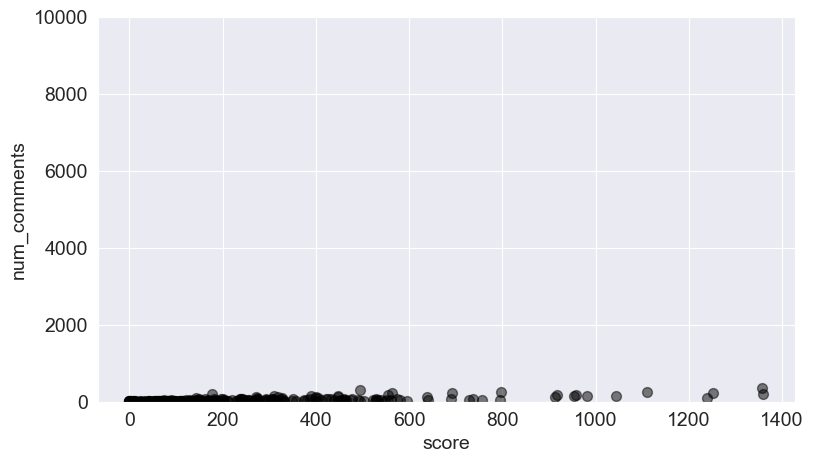

In [75]:
ax=health_reddit.plot.scatter(x='score', y='num_comments',s=50,c='k',alpha=.5)
ax.set_ylim((0, 170000))
ax.set_ylim((0,10000))

##### Additional steps

Adding a percentage to the comment and scores

In [91]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'id': ['1grtoqr', '1grm4dj', '1gru3ix'],  # Ensure all lists have the same length
    'title': ['Trump picks RFK Jr., anti-vaccine activist...', 
              'Want to live an extra 5 years? Those over 40...', 
              'Want to live an extra 5 years? Those over 40...'],  # Fixed length to match 'id'
    'num_comments': [264, 30, 67],  # Fixed length to match 'id'
}

df = pd.DataFrame(data)

# Calculate the total number of comments across all rows
total_comments = df['num_comments'].sum()

# Add a new column 'percentage_of_comments'
df['percentage_of_comments'] = (df['num_comments'] / total_comments) * 100

# Display the updated DataFrame
print(df)




        id                                            title  num_comments  \
0  1grtoqr    Trump picks RFK Jr., anti-vaccine activist...           264   
1  1grm4dj  Want to live an extra 5 years? Those over 40...            30   
2  1gru3ix  Want to live an extra 5 years? Those over 40...            67   

   percentage_of_comments  
0               73.130194  
1                8.310249  
2               18.559557  


In [93]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'id': ['1grtoqr', '1grm4dj', '1gru3ix'],
    'title': ['Trump picks RFK Jr., anti-vaccine activist...', 
              'Want to live an extra 5 years? Those over 40...', 
              'Want to live an extra 5 years? Those over 40...'],
    'num_comments': [264, 30, 67],
    'score': [797, 59, 238]  # Sample score data
}

df = pd.DataFrame(data)

# Calculate the total number of comments
total_comments = df['num_comments'].sum()

# Calculate the total score
total_score = df['score'].sum()

# Add new columns for percentage of comments and scores
df['percentage_of_comments'] = (df['num_comments'] / total_comments) * 100
df['percentage_of_scores'] = (df['score'] / total_score) * 100

# Display the updated DataFrame
print(df)


        id                                            title  num_comments  \
0  1grtoqr    Trump picks RFK Jr., anti-vaccine activist...           264   
1  1grm4dj  Want to live an extra 5 years? Those over 40...            30   
2  1gru3ix  Want to live an extra 5 years? Those over 40...            67   

   score  percentage_of_comments  percentage_of_scores  
0    797               73.130194             72.851920  
1     59                8.310249              5.393053  
2    238               18.559557             21.755027  


#### Explanation
Steps to prepare data:
Steps to clean data:
Steps in creating additional columns:

### Step 3 - Exploratory Data analysis


In [108]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

# Sum a column, for example, 'Column_name'
total_sum = df['num_comments'].sum()
total_counts = df['score'].sum()

print("The sum of num_comments is:", total_sum)
print("The sum of score is:", total_counts)


The sum of num_comments is: 10537
The sum of score is: 72950


In [85]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Additional step

###### Adding an index to the data set